The USArrests data set. For each of the 50 states in the United States, the data set contains the number of arrests per 100, 000 residents for each of three crimes: Assault, Murder, and Rape. We also record UrbanPop (the percent of the population in each state living in urban areas).
1. Kmeans for identifying the similar kind of states in crime 
2. HC. 
3. PCA 
4. Explained variance plot
5. Kmeans  using principal components
6. HC using principal components

In [1]:
# import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from scipy import stats
import scipy.stats as scp

#**Qn.1 Read the dataset to the python environment**

In [3]:
#Load the csv files into pandas dataframe
Data=pd.read_csv('US-Arrests/USArrests.csv')
Data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
Data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
data = pd.DataFrame(Data)
data.rename(columns={'Unnamed: 0':'States'},inplace=True)  
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
df= data.iloc[:,1:5]

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
df.shape

(50, 4)

In [9]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


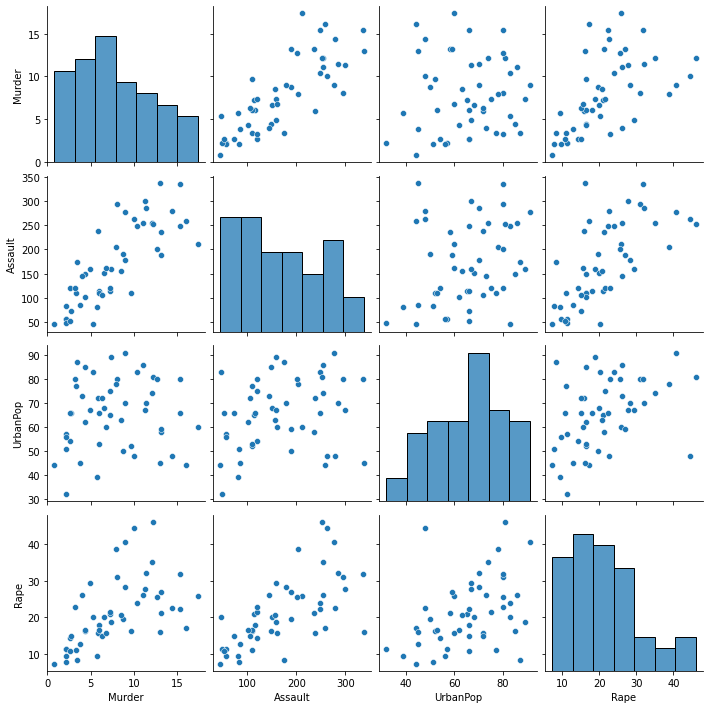

In [11]:
sns.pairplot(df)

In [13]:
from sklearn.preprocessing import Normalizer
df1=pd.DataFrame(Normalizer().fit_transform(df),columns=df.columns,index=data.index)
df1.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


# **K-Means Clustering**

### Elbow Method for finding optimum number of clusters

In [14]:
from sklearn.cluster import KMeans
ks=range(1,10)
inertia=[]                                                           # Creating empty list of inertia
for k in ks:                                                         # Creating an instace of the model using for loop
    model=KMeans(n_clusters=k,init='k-means++',random_state=42)    
    model.fit(df1)                                                  # Fit the model with the dataset
    inertia.append(model.inertia_)                                   # Checking the inertia and appending that to the empty list

<function matplotlib.pyplot.show>

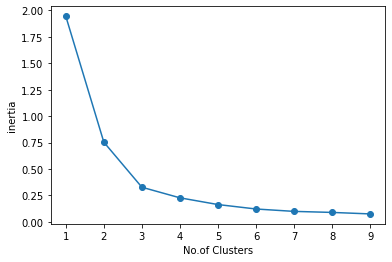

In [15]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No.of Clusters')
plt.ylabel('inertia')
plt.show

In [16]:
from sklearn.cluster import KMeans       # K-Means modelling using the optimum value
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(df1)
labels=model_kmeans.predict(df1)
print(labels)

[1 1 1 1 1 1 0 1 1 1 2 0 1 0 2 0 0 1 0 1 0 1 2 1 1 0 0 1 2 0 1 1 1 2 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 2 1]


In [17]:
k_df=data.copy()
k_df['Crime Group_Kmeans']=labels        # Assigning labels to a target variable named Crime Group_KMeans
k_df.tail(5)

,States,Murder,Assault,UrbanPop,Rape,Crime Group_Kmeans
45,Virginia,8.5,156,63,20.7,1
46,Washington,4.0,145,73,26.2,0
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,2
49,Wyoming,6.8,161,60,15.6,1


# 1. Kmeans for identifying the similar kind of states in crime

Since, there are 3 optimum clusters we can find out similar kind of states 
under Cluster0(C0),Cluster1(C1) and Cluster2(C2)

In [18]:
C0=k_df.groupby('Crime Group_Kmeans')['States'].unique()[0]
print('Similar kind of sates Coming Under Cluster0 :',C0)

Similar kind of sates Coming Under Cluster0 : ['Connecticut' 'Idaho' 'Indiana' 'Kansas' 'Kentucky' 'Maine'
 'Massachusetts' 'Montana' 'Nebraska' 'New Jersey' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah' 'Vermont'
 'Washington' 'West Virginia']


In [19]:
C1=k_df.groupby('Crime Group_Kmeans')['States'].unique()[1]
print('Similar kind of sates Coming Under Cluster0 :',C1)

Similar kind of sates Coming Under Cluster0 : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Delaware' 'Florida' 'Georgia' 'Illinois' 'Louisiana' 'Maryland'
 'Michigan' 'Mississippi' 'Missouri' 'Nevada' 'New Mexico' 'New York'
 'North Carolina' 'South Carolina' 'Tennessee' 'Texas' 'Virginia'
 'Wyoming']


In [20]:
C2=k_df.groupby('Crime Group_Kmeans')['States'].unique()[2]
print('Similar kind of sates Coming Under Cluster0 :',C2)

Similar kind of sates Coming Under Cluster0 : ['Hawaii' 'Iowa' 'Minnesota' 'New Hampshire' 'North Dakota' 'Wisconsin']


#**2. Hierarchial Clustering_Iris Dataset**

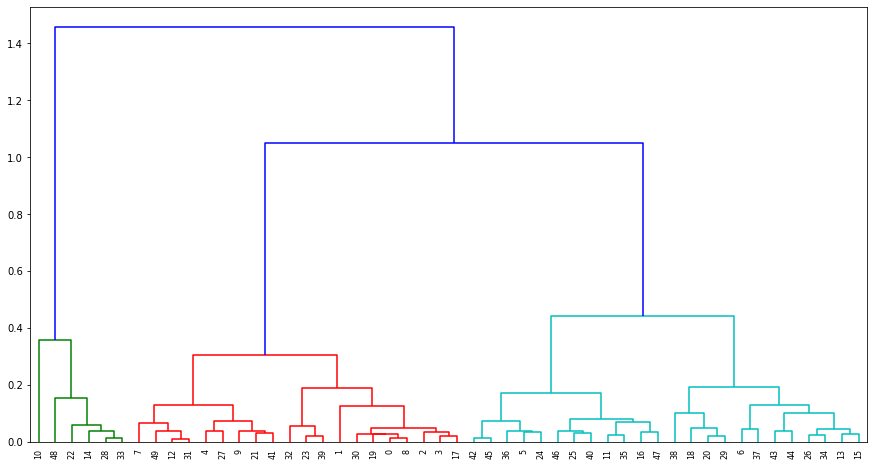

In [21]:
# Using the dendrogram to find the number of clusters
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df1,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels1=cluster.fit_predict(df1)
labels1

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

In [23]:
# Fetching cluster labels
k_df['Crime Group_HC']=labels1             # Assigning labels to a target variable named Wine_Classes
k_df.tail(5)

,States,Murder,Assault,UrbanPop,Rape,Crime Group_Kmeans,Crime Group_HC
45,Virginia,8.5,156,63,20.7,1,0
46,Washington,4.0,145,73,26.2,0,0
47,West Virginia,5.7,81,39,9.3,0,0
48,Wisconsin,2.6,53,66,10.8,2,1
49,Wyoming,6.8,161,60,15.6,1,2


Since, there are 3 optimum clusters we can find out similar kind of states 
under Cluster0(C0),Cluster1(C1) and Cluster2(C2)

In [24]:
C0=k_df.groupby('Crime Group_HC')['States'].unique()[0]
print('Similar kind of sates Coming Under Cluster0 :',C0)

Similar kind of sates Coming Under Cluster0 : ['Colorado' 'Connecticut' 'Idaho' 'Indiana' 'Kansas' 'Kentucky' 'Maine'
 'Massachusetts' 'Missouri' 'Montana' 'Nebraska' 'New Jersey' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Texas'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia']


In [25]:
C1=k_df.groupby('Crime Group_HC')['States'].unique()[1]
print('Similar kind of sates Coming Under Cluster1 :',C1)

Similar kind of sates Coming Under Cluster1 : ['Hawaii' 'Iowa' 'Minnesota' 'New Hampshire' 'North Dakota' 'Wisconsin']


In [26]:
C2=k_df.groupby('Crime Group_HC')['States'].unique()[2]
print('Similar kind of sates Coming Under Cluster2 :',C2)

Similar kind of sates Coming Under Cluster2 : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Delaware' 'Florida'
 'Georgia' 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Wyoming']


# **3. PCA**

In [27]:
df1.shape

(50, 4)

In [28]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df1)
scaled_data = pd.DataFrame(scaled_data, columns = df1.columns)
scaled_data.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.775558e-18,1.085798e-15,3.430589e-16,3.330669e-17
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.886821e+00,-4.057535e+00,-1.679218e+00,-2.174417e+00
25%,-8.873714e-01,-3.105756e-01,-7.890069e-01,-7.538796e-01
50%,-8.548299e-02,2.546058e-01,-8.846492e-02,-5.384970e-02
75%,6.143429e-01,6.989077e-01,6.008371e-01,5.728196e-01
max,2.600971e+00,1.069999e+00,2.690093e+00,2.509737e+00


In [29]:
# Doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
print(f'Number of Principal Components to explain 95% variance = {pca.n_components_}')

Number of Principal Components to explain 95% variance = 3


## **4. Explained variance plot**

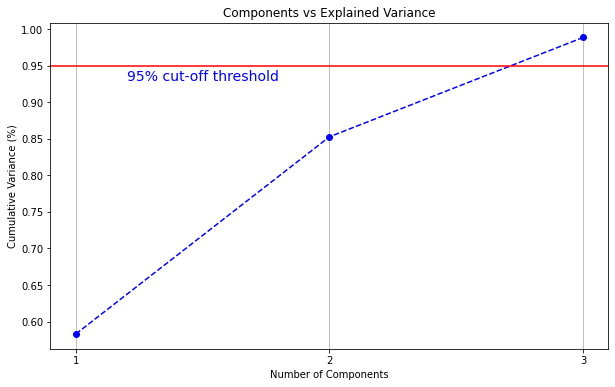

In [30]:
plt.figure(figsize = (10, 6))
x = np.arange(1, pca.n_components_+1 , step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y, marker = "o", linestyle = "--", color = "b")
# horizontal line for 95% cutoff threshold
plt.axhline(y = 0.95, color = 'r', linestyle = "-")
plt.text(1.2, 0.93, "95% cut-off threshold", color = 'b', fontsize = 14)
plt.xticks(x)
plt.grid(axis = 'x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title("Components vs Explained Variance")
plt.show()

In [31]:
print(pca.explained_variance_ratio_)

[0.5829407  0.2696689  0.13585957]


The first principal component explains 58.29% of the total variations in the dataset.

The second principal component explains 26.96% of the total variations.

The third principal component explains 13.58% of the total variations.

# 5. Kmeans using principal components

In [32]:
from sklearn.cluster import KMeans
ks=range(1,15)
inertia=[]                                                          
for k in ks:                                                        
    model=KMeans(n_clusters=k,init='k-means++',random_state=42)    
    model.fit(data_pca)                                                 
    inertia.append(model.inertia_)                                  

<function matplotlib.pyplot.show>

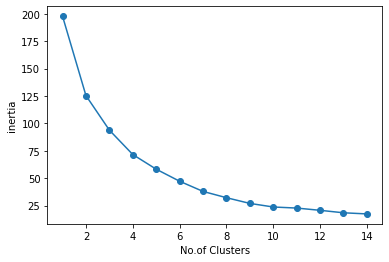

In [33]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No.of Clusters')
plt.ylabel('inertia')
plt.show

In [34]:
from sklearn.cluster import KMeans       # K-Means modelling using the optimum value 4
model_kmeans=KMeans(n_clusters=4)
model_kmeans.fit(data_pca)
labels=model_kmeans.predict(data_pca)
print(labels)

[3 0 2 3 0 0 2 2 3 3 1 2 3 0 1 0 3 3 2 3 2 3 1 3 0 0 0 0 1 2 3 3 3 1 0 0 0
 0 2 3 0 3 3 0 0 3 0 3 1 3]


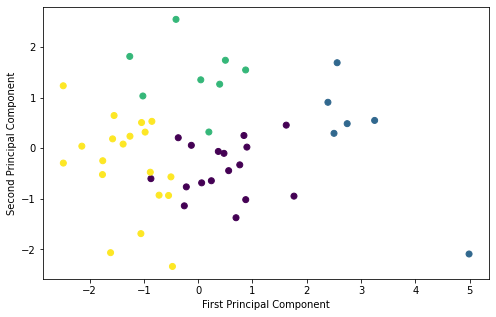

In [35]:
# plotting the PCA components
plt.figure(figsize =(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [36]:
k_df['PCA_kmeans']=labels1             
k_df.tail(5)

,States,Murder,Assault,UrbanPop,Rape,Crime Group_Kmeans,Crime Group_HC,PCA_kmeans
45,Virginia,8.5,156,63,20.7,1,0,0
46,Washington,4.0,145,73,26.2,0,0,0
47,West Virginia,5.7,81,39,9.3,0,0,0
48,Wisconsin,2.6,53,66,10.8,2,1,1
49,Wyoming,6.8,161,60,15.6,1,2,2


# 6. Agglomerative HC using PCA

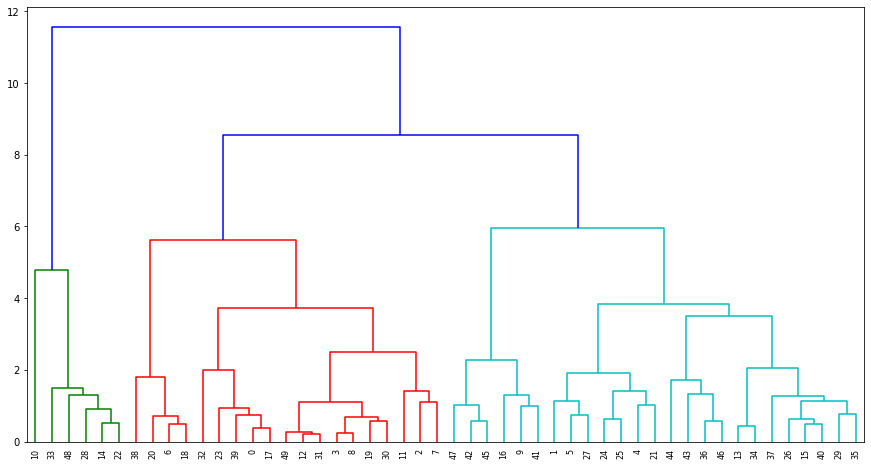

In [37]:
# Using the dendrogram to find the number of clusters
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(data_pca,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels1=cluster.fit_predict(data_pca)
labels1

array([2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2])

In [39]:
k_df['PCA_HC']=labels1             
k_df.tail(5)

,States,Murder,Assault,UrbanPop,Rape,Crime Group_Kmeans,Crime Group_HC,PCA_kmeans,PCA_HC
45,Virginia,8.5,156,63,20.7,1,0,0,0
46,Washington,4.0,145,73,26.2,0,0,0,0
47,West Virginia,5.7,81,39,9.3,0,0,0,0
48,Wisconsin,2.6,53,66,10.8,2,1,1,1
49,Wyoming,6.8,161,60,15.6,1,2,2,2
